<a href="https://colab.research.google.com/github/fbeilstein/presentations/blob/master/presentation_for_October_31_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#@title how ML works
%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<style>
  .container {
    height: 500px;
    display: flex;
    flex-direction: column;
    align-items: center;
    justify-content: center;
}

.caption {
    margin-bottom: 50px; /* Adds space between caption and list */
}

.centered-list {
    display: flex;
    flex-direction: column;
    align-items: left;
    justify-content: space-around;
    gap: 40px; /* Increases space between list items */
    //list-style-type: none;
    padding: 0;
    margin: 0;
    font-size:40px;
}
.centered-list li {
  position: relative;
  padding-bottom: 20px; /* Ensures space for explanations */
}
.explanation {
  font-size: 0.4em;
  color: grey;
  margin-top: 5px;
  position: absolute; /* Makes the explanation float over the list item */
  //left: 50%;
  //transform: translateX(-50%);
  top: 100%; /* Places the explanation just below each list item */
  white-space: nowrap;
  display: none; /* Initially hidden */
}
.explanationV {
  font-size: 0.4em;
  color: grey;
  margin-top: 5px;
  position: absolute; /* Makes the explanation float over the list item */
  //left: 50%;
  //transform: translateX(-50%);
  top: 100%; /* Places the explanation just below each list item */
  white-space: nowrap;
  display: block; /* Initially hidden */
}
</style>
<script>
load_slides_from(
[
`<img src='https://fbeilstein.github.io/machine_learning/lecture_08_statistics/bias_variance_function_space.svg'></img>`,
`
<div style="height:500px;">
  <h2 class="caption">We will get different ML methods depending on how we answer the following questions:</h2>
  <ul class="centered-list">
    <li>
      How do we choose the family of functions?
      <p class="explanation">The family of functions should be parametrized with a finite set of real numbers</p>
    </li>
    <li>
      How do we measure the "goodness" of a function?
      <p class="explanation">We have no access to the "perfect function" so we should avoid using it</p>
    </li>
    <li>
      How to maximize the goodness?
      <p class="explanation">We should build some iterative process that converges</p>
    </li>
  </ul>
</div>
`,
`
<div style="height:500px;">
  <h2 class="caption">We will get different ML methods depending on how we answer the following questions:</h2>
  <ul class="centered-list">
    <li>
      How do we choose the family of functions?
      <p class="explanationV">The family of functions should be parametrized with a finite set of real numbers</p>
    </li>
    <li>
      How do we measure the "goodness" of a function?
      <p class="explanation">We have no access to the "perfect function" so we should avoid using it</p>
    </li>
    <li>
      How to maximize the goodness?
      <p class="explanation">We should build some iterative process that converges</p>
    </li>
  </ul>
</div>
`,
`
<div style="height:500px;">
  <h2 class="caption">We will get different ML methods depending on how we answer the following questions:</h2>
  <ul class="centered-list">
    <li>
      How do we choose the family of functions?
      <p class="explanationV">The family of functions should be parametrized with a finite set of real numbers</p>
    </li>
    <li>
      How do we measure the "goodness" of a function?
      <p class="explanationV">We have no access to the "perfect function" so we should avoid using it</p>
    </li>
    <li>
      How to maximize the goodness?
      <p class="explanation">We should build some iterative process that converges</p>
    </li>
  </ul>
</div>
`,
`
<div style="height:500px;">
  <h2 class="caption">We will get different ML methods depending on how we answer the following questions:</h2>
  <ul class="centered-list">
    <li>
      How do we choose the family of functions?
      <p class="explanationV">The family of functions should be parametrized with a finite set of real numbers</p>
    </li>
    <li>
      How do we measure the "goodness" of a function?
      <p class="explanationV">We have no access to the "perfect function" so we should avoid using it</p>
    </li>
    <li>
      How to maximize the goodness?
      <p class="explanationV">We should build some iterative process that converges</p>
    </li>
  </ul>
</div>
`
])
</script>

In [ ]:
#@title ##Back propagation (how to get gradient)

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_1.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_2.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_3.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_4.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_5.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_6.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_7.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_8.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_9.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_10.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_11.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_12.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_13.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_14.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_15.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_16.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_17.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_18.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_19.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_20.jpg" width="750px">
`
  ]
)
</script>

In [ ]:
#@title  ##Single neuron operation

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/forward.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward_two_outs.jpg" width="750px">`
  ]
)
</script>

In [ ]:
#@title ##NN example

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_1.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_2.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_3.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_4.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_5.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_6.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_7.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_8.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_9.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_10.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_11.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_12.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_13.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_14.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_15.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_16.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_17.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_18.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_19.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_20.jpg" width="750px">`
  ]
)
</script>

# Example SimpleRandomNet

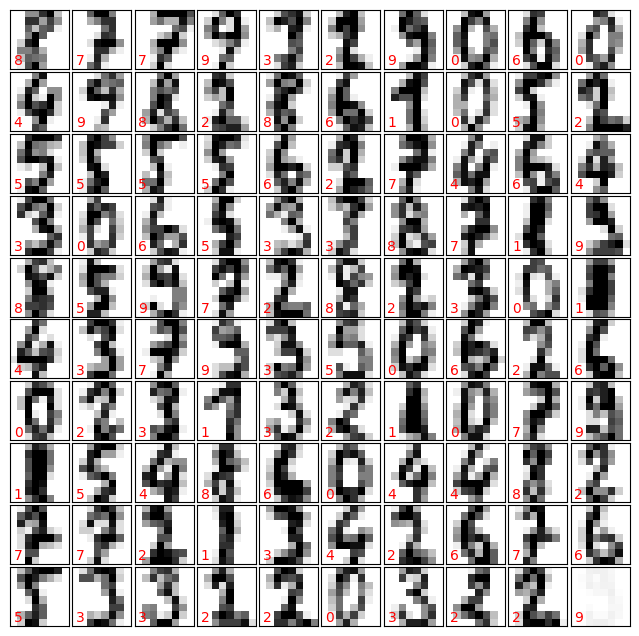

In [54]:
#@title Get Dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import torch

def to_categorical(y, num_classes=10):
    return np.eye(num_classes, dtype=float)[y]

digits = load_digits()
X_all = (digits.data.reshape(digits.data.shape[0], 8, 8, 1) / 16.0).astype(float)

X_train, X_test, y_train, y_test =  train_test_split(X_all,
                                                     digits.target,
                                                     train_size=0.75,
                                                     shuffle=True)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def plot_digits(data, y):
  fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(hspace=0.05, wspace=0.05)
  for i, axi in enumerate(ax.flat):
    im = axi.imshow(data[i,:,:,0], cmap='binary')
    axi.text(0, 7, str(np.argmax(y[i])), c='r')
  im.set_clim(0, 16)

plot_digits(X_train, y_train)
X_trainT = torch.tensor(np.transpose(X_train, (0, 3, 1, 2)), dtype=torch.float32)
y_trainT = torch.tensor(y_train, dtype=torch.float32)
X_testT = torch.tensor(np.transpose(X_test, (0, 3, 1, 2)), dtype=torch.float32)
y_testT = torch.tensor(y_test, dtype=torch.float32)

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class RandNet(nn.Module):
  def __init__(self, input_shape, nb_classes):
    super(RandNet, self).__init__()
    self._out_channels = 6
    self._conv = nn.Conv2d(in_channels=1, out_channels=self._out_channels, kernel_size=3, padding=1, stride=1)
    self._pool = nn.AvgPool2d(kernel_size=2, stride=2)
    self._flatten = nn.Flatten()
    self._fc = nn.Linear(input_shape[1] // 2 * input_shape[2] // 2 * self._out_channels, nb_classes)

  def forward(self, x):
    conv_out = torch.tanh(self._conv(x))
    pool_out = self._pool(conv_out)
    flat_out = self._flatten(pool_out)
    out = F.softmax(self._fc(flat_out), dim=1)
    return conv_out, pool_out, flat_out, out

model = RandNet(X_trainT[0].shape, 10)
summary(model, input_size=X_trainT[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 6, 8, 8]              60
         AvgPool2d-2              [-1, 6, 4, 4]               0
           Flatten-3                   [-1, 96]               0
            Linear-4                   [-1, 10]             970
Total params: 1,030
Trainable params: 1,030
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [57]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4000
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  _, _, _, outputs = model(X_trainT)
  loss = criterion(outputs, y_trainT)
  loss.backward()
  optimizer.step()
  epoch_loss = loss.item()
  if epoch % 200 == 0:
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/4000, Loss: 2.3014
Epoch 201/4000, Loss: 1.8617
Epoch 401/4000, Loss: 1.6485
Epoch 601/4000, Loss: 1.5789
Epoch 801/4000, Loss: 1.5473
Epoch 1001/4000, Loss: 1.5284
Epoch 1201/4000, Loss: 1.5161
Epoch 1401/4000, Loss: 1.5076
Epoch 1601/4000, Loss: 1.5013
Epoch 1801/4000, Loss: 1.4965
Epoch 2001/4000, Loss: 1.4925
Epoch 2201/4000, Loss: 1.4892
Epoch 2401/4000, Loss: 1.4864
Epoch 2601/4000, Loss: 1.4840
Epoch 2801/4000, Loss: 1.4821
Epoch 3001/4000, Loss: 1.4804
Epoch 3201/4000, Loss: 1.4788
Epoch 3401/4000, Loss: 1.4775
Epoch 3601/4000, Loss: 1.4762
Epoch 3801/4000, Loss: 1.4744


**Categorical cross-entropy** loss function $L$ is computed as follows
$$
L = \sum_i t_i \ln(\sigma_i),
$$
where $t_i$ are truth values and $s_i$ are **softmax** outputs
$$
\sigma_i(\mathbf{z}) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \text{ for } i = 1, \dotsc, K \text{ and } \mathbf{z} = (z_1, \dotsc, z_K) \in \mathbb{R}^K.
$$
In our case $t_i$ are either $0$ or $1$ (see `to_categorical` function). We may have used `sparse_crossentropy`, same function different class encoding.

Validation Loss: 1.5001, Accuracy: 0.9689


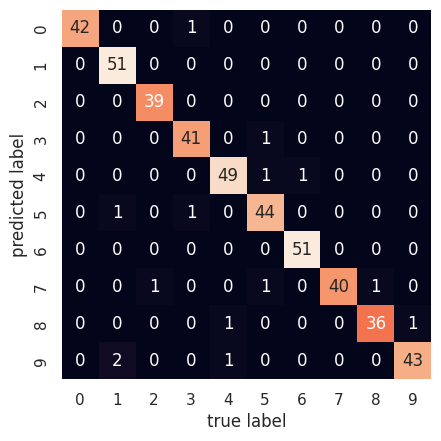

In [58]:

model.eval()  # Set model to evaluation mode
val_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():  # Disable gradient computation
  # Forward pass
  _, _, _, outputs = model(X_testT)

  # Calculate the loss
  loss = criterion(outputs, y_testT.argmax(dim=1))
  val_loss += loss.item()

  # Calculate the number of correct predictions
  predicted = torch.argmax(outputs, dim=1)
  correct_predictions += (predicted == y_testT.argmax(dim=1)).sum().item()
  total_samples += y_testT.size(0)


accuracy = correct_predictions / total_samples
print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(np.argmax(y_test, axis=1), predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

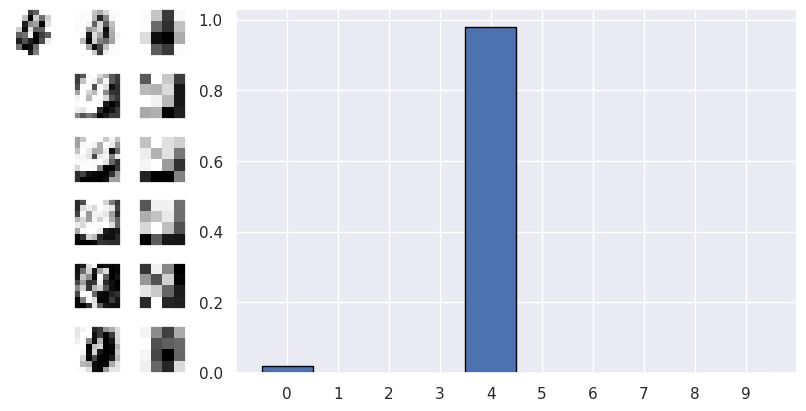

INPUT -> CONVOLUTION -> AVERAGE POOLING -> FULLY CONNECTED (RESULT)


In [89]:
#@title Internal structure visualization
idx = 0
conv_outs, pool_outs, flat_outs, outputs = model(X_trainT)

def plot_out(idx):
  fig = plt.figure(figsize=(8,4), constrained_layout=True)
  grid = plt.GridSpec(6, 4, wspace=0, hspace=0, figure=fig,
                      width_ratios=[1,1,1,10], height_ratios=[1,1,1,1,1,1])

  ax_in = plt.subplot(grid[0,0], xticks=[], yticks=[])
  axs_conv = [plt.subplot(grid[i,1], xticks=[], yticks=[]) for i in range(6)]
  axs_avg = [plt.subplot(grid[i,2], xticks=[], yticks=[]) for i in range(6)]
  ax_result = plt.subplot(grid[:,3], xticks=[0,1,2,3,4,5,6,7,8,9])
  #plt.subplot(grid[0,1:])
  #plt.subplot(grid[1,:2])
  #plt.subplot(grid[1,2]);

  #print("INPUT:")
  #fig, ax = plt.subplots(1, 1, figsize=(1, 1), subplot_kw=dict(xticks=[], yticks=[]))
  ax_in.imshow(np.transpose(X_trainT[idx], (1, 2, 0)), cmap='binary')
  #plt.show()

  #print('CONVOLUTION:')
  #fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
  #fig.subplots_adjust(hspace=0.05, wspace=0.05)
  #for i, axi in enumerate(ax.flat):
  for i, axi in enumerate(axs_conv):
    axi.imshow(conv_outs.detach().numpy()[idx, i, :, :], cmap='binary')
  #plt.show()

  #print('AVERAGE POOL:')
  #fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
  #fig.subplots_adjust(hspace=0.05, wspace=0.05)
  #for i, axi in enumerate(ax.flat):
  for i, axi in enumerate(axs_avg):
    axi.imshow(pool_outs.detach().numpy()[idx, i, :, :], cmap='binary')
  #plt.show()

  #print('OUTPUT:')
  bin_edges = [x - 0.5 for x in range(11)]
  bar_heights = outputs[idx].detach().numpy()
  bar_widths = [1] * 10
  ax_result.bar(bin_edges[:-1], bar_heights, width=bar_widths, align='edge', edgecolor='black')
  #ax_result.xlabel('Numbers')
  #ax_result.ylabel('Probabilities')
  plt.show()
  print("INPUT -> CONVOLUTION -> AVERAGE POOLING -> FULLY CONNECTED (RESULT)")

def on_button_clicked_next(*args):
  global idx
  idx = (1 + idx) % len(X_trainT)
  clear_output()
  display(widgets.HBox([buttonN, buttonP]))
  plot_out(idx)

def on_button_clicked_previous(*args):
  global idx
  idx = (idx - 1 + len(X_trainT)) % len(X_trainT)
  clear_output()
  display(widgets.HBox([buttonN, buttonP]))
  plot_out(idx)

from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output

buttonN = widgets.Button(description="Next")
buttonP = widgets.Button(description="Previous")

clear_output()
display(widgets.HBox([buttonN, buttonP]))
buttonN.on_click(on_button_clicked_next)
buttonP.on_click(on_button_clicked_previous)

In [90]:
#@title #Visualization code
import IPython
from google.colab import output
import numpy as np
import json

def process_symbol(array_8x8):
  to_format = np.array(array_8x8, dtype=float)[np.newaxis, np.newaxis, :, :]/8.0
  _, _, _, outputs = model(torch.tensor(to_format, dtype=torch.float32))
  R = np.argmax(outputs.detach().numpy())
  return R

def do_recognition(array_8x8):
  arr = np.transpose(np.array(array_8x8))
  return IPython.display.JSON({'msg': process_symbol(arr)})

main_str = '''
<body>
  	<div id="paint">
  		<canvas id="myCanvas" width="600" height="600"
              onmousedown="start_paint(event)"
              onmousemove="do_paint(event)"
              onmouseup="stop_paint(event)"
              style="border:3px solid #000000;">
      </canvas>
	  </div>
    <div style="position:absolute; top:0px; left:625px;">
        <h2> Cropped image </h2>
        <img id="partial_image" style="width:80px; height:80px; border:3px solid #000000;">
        <h2> 8x8x16 grayscale colors </h2>
        <canvas id="bin_canvas" width="80" height="80"
              style="border:3px solid #000000;">
        </canvas>
        <h2> Recognize symbol </h2>
        <button type="button" onclick="process_data();">
        Do recognition
        </button>
        <h2> Clean canvas </h2>
        <button type="button" onclick="clear_canvas();">
        Clean
        </button>
        <h2> Recognition result </h2>
        <div id="rec_res" style="font-size:40px;"></div>
    </div>
<script>

var canvas = document.getElementById('myCanvas');
var ctx = canvas.getContext('2d');
var ctx_2 = document.getElementById("bin_canvas").getContext("2d");
var mouse = {x: 0, y: 0, state: 0, min_x: 600, max_x: 0, min_y: 600, max_y: 0};
var full_image = ctx.getImageData(0, 0, 600, 600);
var partial_image = document.getElementById('partial_image');
var binarized = [[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]]

ctx.lineJoin = 'round';
ctx.lineCap = 'round';


function start_paint(e)
{
  ctx.putImageData(full_image, 0, 0);
  mouse.state = 1;
  ctx.beginPath();
  ctx.moveTo(mouse.x, mouse.y);
}

function do_paint(e)
{
  mouse.x = e.pageX - 10;
  mouse.y = e.pageY - 10;
  if (!mouse.state)
    return;
  ctx.lineTo(mouse.x, mouse.y);
  ctx.lineWidth = 10;
  ctx.strokeStyle = '#000000';
  ctx.stroke();
  full_image = ctx.getImageData(0, 0, 600, 600);
  if (mouse.min_x > mouse.x)
    mouse.min_x = mouse.x;
  if (mouse.min_y > mouse.y)
    mouse.min_y = mouse.y;
  if (mouse.max_x < mouse.x)
    mouse.max_x = mouse.x;
  if (mouse.max_y < mouse.y)
    mouse.max_y = mouse.y;
}

function stop_paint(e)
{
  mouse.state = 0;
  full_image = ctx.getImageData(0, 0, 600, 600);

  c_x = (mouse.max_x + mouse.min_x) / 2;
  c_y = (mouse.max_y + mouse.min_y) / 2;
  a = Math.max(mouse.max_x - mouse.min_x, mouse.max_y - mouse.min_y);
  a += 7;
  var part = ctx.getImageData(c_x - a/2, c_y - a/2, a, a);
  partial_image.src = getImageURL(part);

  for (var i = 0; i < 8; i++)
    for (var j = 0; j < 8; j++)
      binarized[i][j] = 0;

  for (var idx_y = 0; idx_y < part.height; idx_y += 1)
    for (var idx_x = 0; idx_x < part.width; idx_x += 1)
      if (part.data[idx_y * part.width * 4 + idx_x * 4 + 3] > 1)
      	binarized[Math.floor(8 * idx_x / part.width)][Math.floor(8 * idx_y / part.height)] += 1;

  for (var i = 0; i < 8; i++)
    for (var j = 0; j < 8; j++)
      binarized[i][j] = Math.floor(16 * binarized[i][j] / (part.width * part.height) * (8*8));

  for (var i = 0; i < 8; i++)
    for (var j = 0; j < 8; j++)
    {
      ctx_2.fillStyle = "rgba(" + [256 - 16*binarized[i][j], 256 - 16*binarized[i][j], 256 - 16*binarized[i][j], 255].join(",") + ")";
      ctx_2.fillRect(i * 10, j * 10, 10, 10);
    }

  ctx.lineWidth = 2;
  ctx.strokeStyle = '#FF0000';
  ctx.strokeRect(c_x - a/2, c_y - a/2, a, a);
}

function getImageURL(imgData)
{
   var canvas = document.createElement('canvas');
   var ctx = canvas.getContext('2d');
   canvas.width = imgData.width;
   canvas.height = imgData.height;
   ctx.putImageData(imgData, 0, 0);
   return canvas.toDataURL(); //image URL
}

async function process_data()
{
  const result = await google.colab.kernel.invokeFunction('notebook.DoRec', [binarized], {});
  params = result.data['application/json'];
  document.getElementById('rec_res').innerHTML = params.msg;
}

function clear_canvas()
{
  mouse = {x: 0, y: 0, state: 0, min_x: 600, max_x: 0, min_y: 600, max_y: 0};
  binarized = [[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]];
  ctx.clearRect(0, 0, canvas.width, canvas.height);
  full_image = ctx.getImageData(0, 0, 600, 600);
  ctx_2.clearRect(0, 0, 80, 80);
  var part = ctx.getImageData(0, 0, 80, 80);
  partial_image.src = getImageURL(part);
  document.getElementById('rec_res').innerHTML = "";
}

    </script>
  </body>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.DoRec', do_recognition)